In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Dataset
import torch
from torch import nn
import timm
import config as CFG

from torch_geometric.nn import SAGEConv
from transformers import RobertaModel
from utils import LABELS
import torch.nn.functional as F
import random
import warnings

In [5]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.RandomRotation(10),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [51]:
Ds_train = datasets.ImageFolder("/mnt/disk1/vaipe-thanhnt/EMED-Prescription-and-Pill-matching/data/pills/train/20210407_223358076879/Aerius_5mg", transform=transform)

RuntimeError: Found 0 files in subfolders of: /mnt/disk1/vaipe-thanhnt/EMED-Prescription-and-Pill-matching/data/pills/train/20210407_223358076879/Aerius_5mg
Supported extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm,.tif,.tiff,.webp

In [19]:
len(Ds_train)

588

In [47]:
Dl_train = DataLoader(dataset_subset, batch_size=16, shuffle=False)

In [48]:
len(Dl_train)

1

In [49]:
i1, l1 = next(iter(Dl_train))
print(i1.shape)

torch.Size([5, 3, 224, 224])


In [50]:
l1

tensor([3, 1, 3, 2, 1])

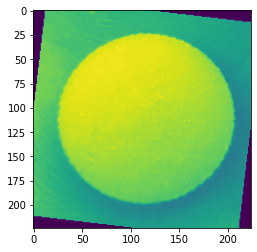

In [12]:
# show image
import matplotlib.pyplot as plt

plt.imshow(i1[0][0])

In [28]:
i1[0].shape

torch.Size([3, 224, 224])

In [25]:
class ImageEncoder(nn.Module):
    """
    Encode images to a fixed size vector
    """

    def __init__(
        self, model_name=CFG.model_name, pretrained=CFG.pretrained, trainable=CFG.trainable
    ):
        super().__init__()
        self.model = timm.create_model(
            model_name, pretrained, num_classes=0, global_pool="avg"
        )
        for p in self.model.parameters():
            p.requires_grad = trainable

    def forward(self, x):
        return self.model(x)

In [26]:
image_encoder = ImageEncoder()

In [31]:
image_encoder(i1).shape

torch.Size([16, 2048])